# Desafio DIO
Análise de dados com Python e Pandas

##Dataset utilizado
Serão analisados os dados públicos de Gastos dos deputados, onde o dataset está disponível em:
```https://brasil.io/dataset/gastos-deputados/files/```

Dicionário dos dados disponível [neste link](https://www2.camara.leg.br/transparencia/cota-para-exercicio-da-atividade-parlamentar/explicacoes-sobre-o-formato-dos-arquivos-xml).







In [136]:
import pandas as pd
import matplotlib.pyplot as plt

In [137]:
# Importa do Google Drive o arquivo comprimido em GZip
origem_dataset = '/content/drive/MyDrive/datasets/cota_parlamentar.csv.gz'
df = pd.read_csv(origem_dataset, compression='gzip', sep=',', quotechar='"', error_bad_lines=False)

Análises do dataset importado

In [138]:
df.shape

(3855649, 29)

In [139]:
df.head(3)

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,nummes,numparcela,numressarcimento,numsubcota,sgpartido,sguf,txnomeparlamentar,txtcnpjcpf,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
0,56,2020-02-01 00:00:00,7007086,NaN,0,NaN,2442,2019,2020,0,1672803,2,0,NaN,5,PSDB,NaN,LIDERANÇA DO PSDB,27691290000113,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,CONTENT ASSESSORIA LTDA - ME,432,NaN,NaN,998.0,0.0,998.0,NaN
1,56,2020-02-13 00:00:00,7017162,NaN,4,NaN,2442,2019,2020,0,1677757,1,0,NaN,5,PSDB,NaN,LIDERANÇA DO PSDB,5265605000128,DIVULGAÇÃO DA ATIVIDADE PARLAMENTAR.,NaN,METROPOLE INTERATIVA INFORMATICA LTDA,46,NaN,NaN,4920.0,0.0,4920.0,NaN
2,56,2020-02-04 00:00:00,7007754,NaN,4,NaN,2442,2019,2020,0,1673164,2,0,NaN,13,PSDB,NaN,LIDERANÇA DO PSDB,4538454000171,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,AFC ALIMENTOS LTDA,306,NaN,NaN,511.0,0.0,511.0,NaN


In [140]:
df.tail()

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,nummes,numparcela,numressarcimento,numsubcota,sgpartido,sguf,txnomeparlamentar,txtcnpjcpf,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
3855644,55,2015-12-18 00:00:00,1142632,193066.0,0,562.0,3137,2015,2015,0,0,12,0,0.0,999,MDB,RJ,WILSON BESERRA,2575829000148,Emissão Bilhete Aéreo,NaN,Cia Aérea - AVIANCA,Bilhete: 2419824697,WILSON BESERRA,GIG/BSB,592.45,0.0,592.45,NaN
3855645,55,2015-12-18 00:00:00,1142633,193066.0,0,562.0,3137,2015,2015,0,0,12,0,0.0,999,MDB,RJ,WILSON BESERRA,2575829000148,Emissão Bilhete Aéreo,NaN,Cia Aérea - AVIANCA,Bilhete: 2419824697,WILSON BESERRA,BSB/GIG,1324.83,0.0,1324.83,NaN
3855646,55,2015-12-18 00:00:00,1262967,193066.0,0,562.0,3137,2015,2015,0,0,12,0,0.0,999,MDB,RJ,WILSON BESERRA,2575829000148,Emissão Bilhete Aéreo,NaN,Cia Aérea - AVIANCA,Comp-2419824697,WILSON BESERRA,BSB/GIG,-1194.93,0.0,-1194.93,NaN
3855647,55,2015-12-18 00:00:00,1262966,193066.0,0,562.0,3137,2015,2015,0,0,12,0,0.0,999,MDB,RJ,WILSON BESERRA,2575829000148,Emissão Bilhete Aéreo,NaN,Cia Aérea - AVIANCA,Comp-2419824697,WILSON BESERRA,GIG/BSB,-469.05,0.0,-469.05,NaN
3855648,55,NaN,0,193069.0,0,563.0,3138,2015,2015,0,0,12,0,0.0,10,PSD,RJ,NELSON NAHIM,6,TELEFONIA,NaN,RAMAL,5883397,NaN,NaN,9.85,0.0,9.85,NaN


In [141]:
df.dtypes

codlegislatura                 int64
datemissao                    object
idedocumento                   int64
idecadastro                  float64
indtipodocumento               int64
nucarteiraparlamentar        float64
nudeputadoid                   int64
nulegislatura                  int64
numano                         int64
numespecificacaosubcota        int64
numlote                        int64
nummes                         int64
numparcela                     int64
numressarcimento             float64
numsubcota                     int64
sgpartido                     object
sguf                          object
txnomeparlamentar             object
txtcnpjcpf                     int64
txtdescricao                  object
txtdescricaoespecificacao     object
txtfornecedor                 object
txtnumero                     object
txtpassageiro                 object
txttrecho                     object
vlrdocumento                 float64
vlrglosa                     float64
v

In [142]:
# Verificar se existem colunas com dados ausentes ou NULL
df.isnull().sum()

codlegislatura                     0
datemissao                    190545
idedocumento                       0
idecadastro                     5505
indtipodocumento                   0
nucarteiraparlamentar           5498
nudeputadoid                       0
nulegislatura                      0
numano                             0
numespecificacaosubcota            0
numlote                            0
nummes                             0
numparcela                         0
numressarcimento             2121853
numsubcota                         0
sgpartido                          0
sguf                            5505
txnomeparlamentar                  0
txtcnpjcpf                         0
txtdescricao                       0
txtdescricaoespecificacao    3070965
txtfornecedor                      9
txtnumero                          9
txtpassageiro                2863898
txttrecho                    2851582
vlrdocumento                      17
vlrglosa                           0
v

In [143]:
# Filtrar quais linhas tem Vlr Documento vazio
filtro = df["vlrdocumento"].isnull()
df.loc[filtro]

,codlegislatura,datemissao,idedocumento,idecadastro,indtipodocumento,nucarteiraparlamentar,nudeputadoid,nulegislatura,numano,numespecificacaosubcota,numlote,nummes,numparcela,numressarcimento,numsubcota,sgpartido,sguf,txnomeparlamentar,txtcnpjcpf,txtdescricao,txtdescricaoespecificacao,txtfornecedor,txtnumero,txtpassageiro,txttrecho,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao
698354,54,2013-01-04 00:00:00,5028084,74060.0,0,188.0,1562,2011,2013,1,1006976,1,0,NaN,3,PCdoB,BA,Daniel Almeida,1716090000184,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,SERTO REVEDEDORA DE COMBUSTIVEL LTDA,1027,NaN,NaN,NaN,0.0,3113.38,NaN
726056,54,2013-03-24 00:00:00,5062354,74075.0,0,21.0,1011,2011,2013,0,1016826,3,0,NaN,13,PMDB,PA,Elcione Barbalho,17314329001797,FORNECIMENTO DE ALIMENTAÇÃO DO PARLAMENTAR,NaN,VIENA RA CATERINO LTDA,151333,NaN,NaN,NaN,0.0,26.87,NaN
762361,54,2013-01-11 00:00:00,5016649,74111.0,0,403.0,1227,2011,2013,0,1003807,1,0,NaN,9,PP**,MT,PEDRO HENRY,2012862000160,PASSAGENS AÉREAS,NaN,TAM LINHAS AEREAS S/A,9572461769299,NaN,Cuiabá/Brasilia,NaN,0.0,486.95,NaN
972581,54,2013-01-02 00:00:00,5020247,74216.0,0,102.0,1244,2011,2013,0,1005054,1,0,NaN,1,PSDB,CE,RAIMUNDO GOMES DE MATOS,7040108000157,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,NaN,CAGECE,s/n,NaN,NaN,NaN,0.0,223.30,NaN
975912,54,2013-01-04 00:00:00,5020251,74216.0,0,102.0,1244,2011,2013,0,1005054,1,0,NaN,8,PSDB,CE,RAIMUNDO GOMES DE MATOS,4196136000170,SERVIÇO DE SEGURANÇA PRESTADO POR EMPRESA ESPE...,NaN,SERVIS ELETRONICA DEFENSE LTDA,74187,NaN,NaN,NaN,0.0,140.00,NaN
978009,54,2013-01-18 00:00:00,5020523,74216.0,1,102.0,1244,2011,2013,0,1005053,1,0,NaN,10,PSDB,CE,RAIMUNDO GOMES DE MATOS,33000118000179,TELEFONIA,NaN,TELEMAR NORTE LESTE S/A,00000293695,NaN,NaN,NaN,0.0,181.84,NaN
978011,54,2013-01-18 00:00:00,5020531,74216.0,0,102.0,1244,2011,2013,0,1005053,1,0,NaN,10,PSDB,CE,RAIMUNDO GOMES DE MATOS,33000118000179,TELEFONIA,NaN,TELEMAR NORTE LESTE S/A.,00000293986,NaN,NaN,NaN,0.0,155.87,NaN
978012,54,2013-01-18 00:00:00,5020430,74216.0,0,102.0,1244,2011,2013,0,1005053,1,0,NaN,10,PSDB,CE,RAIMUNDO GOMES DE MATOS,33000118000179,TELEFONIA,NaN,TELEMAR NORTE LESTE S/A.,0900065255177,NaN,NaN,NaN,0.0,4.70,NaN
1249640,54,2013-01-03 00:00:00,5009532,74399.0,0,510.0,1627,2011,2013,1,1002170,1,0,NaN,3,DEM,RS,Onyx Lorenzoni,13216488000130,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,A 3 COMERCIAL DE COMBUSTIVEIS LTDA,171,NaN,NaN,NaN,0.0,2755.87,NaN
1898731,54,2013-03-07 00:00:00,5073020,137983.0,0,567.0,1762,2011,2013,1,1020110,3,0,NaN,3,PMDB,MA,FRANCISCO ESCÓRCIO,35196823000380,COMBUSTÍVEIS E LUBRIFICANTES.,Veículos Automotores,Nicolau Derivados de Petróleo,029659,NaN,NaN,NaN,0.0,150.00,NaN


In [144]:
#Remover colunas sem dados de DateEmissao e Vlr Documentos, pois não pois dados ausentes não servem para a análise
df.dropna(subset=["datemissao", "vlrdocumento"], inplace=True)

In [145]:
# Verificar se as linhas com dados NULL foram removidas:
df[["datemissao", "vlrdocumento"]].isnull().sum()

datemissao      0
vlrdocumento    0
dtype: int64

In [146]:
# Padronizar nomes dos deputados
df['txnomeparlamentar'] = df['txnomeparlamentar'].str.title()

In [147]:
# Vamos remover algumas colunas que não vamos usar na análise
df.drop(columns=["indtipodocumento", "numressarcimento", "txtdescricaoespecificacao", "txtpassageiro", "txttrecho", "numano", "numano"], inplace=True)

In [148]:
df.shape

(3665087, 23)

In [149]:
# O dataset vai até o ano de 2020, mas os dados de 2020 estão incompletos. Vamos analisar quais Anos possuem registros, através do Group By.
# Primeiro, vamos converte o campo object que contem a data para um DateTime, e desconsiderar os valores errados (Existem anos fora do padrão) através do errors="coerce"
df["datemissao"] = pd.to_datetime(df["datemissao"], errors="coerce")
# Extraindo o Mes e o Ano da datemissao
df["ano_emissao"], df["mes_emissao"] = (df["datemissao"].dt.year, df["datemissao"].dt.month)
# Comparando os anos com registros
df.groupby(df["ano_emissao"], dropna=False).size()

ano_emissao
1959.0         1
2000.0         7
2001.0        42
2002.0         3
2004.0         1
2005.0         1
2006.0         5
2007.0         3
2008.0        23
2009.0    264952
2010.0    349118
2011.0    385152
2012.0    357761
2013.0    350347
2014.0    321714
2015.0    370289
2016.0    353260
2017.0    332484
2018.0    281764
2019.0    275249
2020.0     22869
2021.0         1
2042.0         1
2077.0         1
2090.0         1
2099.0         5
2100.0         1
2111.0         2
2200.0         1
2201.0         2
2209.0        17
NaN           10
dtype: int64

In [150]:
# Como temos dados incorretos preenchidos inclusive NaN, foi escolhido trabalhar com os anos de 2016 à 2019
# Assim, vamos remover do dataframe os valores que não serão usados.
# Também será removido valores negativos, pois significam estornos de gastos não utilizados, como de passagens áereas
filtro1 = df["ano_emissao"] >= 2016
filtro2 = df["ano_emissao"] <= 2019
filtro3 = df["vlrliquido"] > 0
df = df[filtro1 & filtro2 & filtro3]
df

,codlegislatura,datemissao,idedocumento,idecadastro,nucarteiraparlamentar,nudeputadoid,nulegislatura,numespecificacaosubcota,numlote,nummes,numparcela,numsubcota,sgpartido,sguf,txnomeparlamentar,txtcnpjcpf,txtdescricao,txtfornecedor,txtnumero,vlrdocumento,vlrglosa,vlrliquido,vlrrestituicao,ano_emissao,mes_emissao
453,56,2019-12-27 00:00:00,7010400,73482.0,498.0,1454,2019,0,1674279,2,0,122,PT,RS,Henrique Fontana,16987837000106,"SERVIÇO DE TÁXI, PEDÁGIO E ESTACIONAMENTO",EGR EMPRESA GAUCHA DE RODOVIAS SA,2302irugang2,4.90,0.00,4.90,NaN,2019.0,12.0
478,56,2019-12-23 00:00:00,7018124,73486.0,516.0,1458,2019,0,1678228,1,0,1,PDT,RS,Pompeo De Mattos,89398606000130,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,GUARIDA SERVIÇOS,0004917829,866.06,18.22,847.84,NaN,2019.0,12.0
479,56,2019-12-23 00:00:00,7018136,73486.0,516.0,1458,2019,0,1678228,1,0,1,PDT,RS,Pompeo De Mattos,89398606000130,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,GUARIDA SERVIÇOS,0004917830,674.96,14.84,660.12,NaN,2019.0,12.0
715,56,2019-12-13 00:00:00,7002114,73696.0,471.0,835,2019,0,1670529,1,0,1,PP,SC,Angela Amin,2835322000186,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Centro Empresarial Barão do Rio Branco,S/N,702.36,154.19,548.17,NaN,2019.0,12.0
716,56,2019-12-13 00:00:00,7002118,73696.0,471.0,835,2019,0,1670529,1,0,1,PP,SC,Angela Amin,2835322000186,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Centro Empresarial Barão do Rio Branco,s/nº,744.84,153.85,590.99,NaN,2019.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3855318,55,2016-03-17 00:00:00,0,191945.0,557.0,3135,2015,0,0,12,0,10,DEM,RJ,Zé Augusto Nalin,1,TELEFONIA,CELULAR FUNCIONAL,5963747,9.51,0.00,9.51,NaN,2016.0,3.0
3855466,55,2016-01-31 00:00:00,5917820,192120.0,559.0,3136,2015,0,1265217,12,1,1,PCdoB,SC,Angela Albino,85307106000195,MANUTENÇÃO DE ESCRITÓRIO DE APOIO À ATIVIDADE ...,Condomínio - Executivo Manhattan,01/16,1206.80,35.15,1022.29,NaN,2016.0,1.0
3855497,55,2016-01-12 00:00:00,0,192120.0,559.0,3136,2015,0,0,12,0,10,PCdoB,SC,Angela Albino,1,TELEFONIA,CELULAR FUNCIONAL,5895660,228.40,0.00,228.40,NaN,2016.0,1.0
3855498,55,2016-02-21 23:00:00,0,192120.0,559.0,3136,2015,0,0,12,0,10,PCdoB,SC,Angela Albino,1,TELEFONIA,CELULAR FUNCIONAL,5956677,0.24,0.00,0.24,NaN,2016.0,2.0


Trabalhando com o datafram de 2016 à 2019

In [151]:
df.groupby(["ano_emissao", 'mes_emissao']).size()

ano_emissao  mes_emissao
2016.0       1.0            18466
             2.0            27941
             3.0            35674
             4.0            30303
             5.0            31360
             6.0            31906
             7.0            27164
             8.0            29857
             9.0            25601
             10.0           26688
             11.0           26232
             12.0           23973
2017.0       1.0            17449
             2.0            25235
             3.0            30271
             4.0            27224
             5.0            30053
             6.0            28270
             7.0            25451
             8.0            30457
             9.0            26935
             10.0           27045
             11.0           23987
             12.0           20569
2018.0       1.0            16717
             2.0            22873
             3.0            29461
             4.0            27805
             5.0       

In [152]:
df.groupby(df["sgpartido"])["vlrliquido"].sum().round(0).sort_values(ascending=False)

sgpartido
PT               105582285.0
PP                90104102.0
MDB               87051326.0
PSDB              76071638.0
DEM               65889592.0
PSD               63986802.0
PR                52688998.0
PSB               47517397.0
PDT               40977293.0
PRB               29031100.0
PTB               28796485.0
PODE              28612719.0
PSL               25753944.0
PCdoB             21047361.0
SOLIDARIEDADE     18887529.0
PROS              18647163.0
PL                15914438.0
PSC               13134989.0
REPUBLICANOS      12325030.0
PPS               11309659.0
PSOL              10924391.0
AVANTE            10714265.0
PATRI              6561910.0
PHS                5896556.0
PV                 4978060.0
CIDADANIA          2810735.0
REDE               2695508.0
PATRIOTA           1846244.0
PPL                1538412.0
NOVO                822494.0
SDD                 241990.0
PRTB                171347.0
LID.GOV-CD           44535.0
LIDMIN               32530.0
PTN 

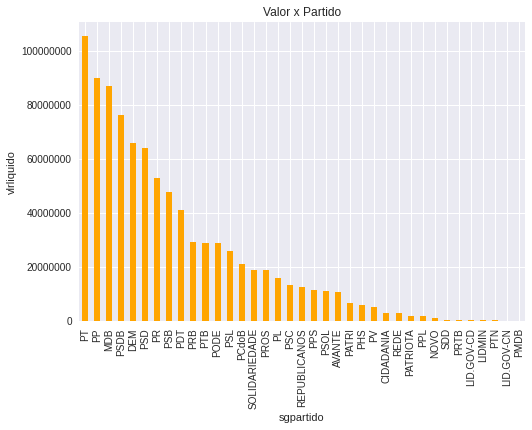

In [153]:
# Gastos por partido
df.groupby(df["sgpartido"])["vlrliquido"].sum().round(2).sort_values(ascending=False).plot.bar(title="Valor x Partido", color="orange")
plt.xlabel("sgpartido")
plt.style.use("seaborn")
plt.ylabel("vlrliquido")
plt.ticklabel_format(style="plain", axis="y");

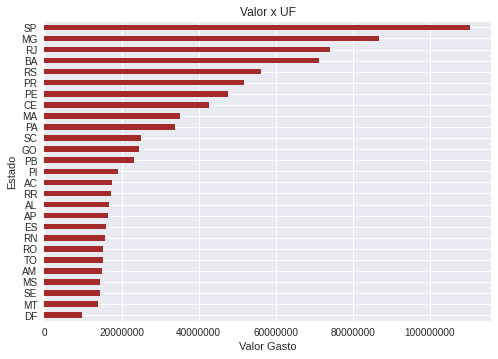

In [154]:
# Gastos por UF
df.groupby(df["sguf"])["vlrliquido"].sum().round(2).sort_values(ascending=True).plot.barh(title="Valor x UF", color="brown")
plt.xlabel("Valor Gasto")
plt.ylabel("Estado")
plt.ticklabel_format(style="plain", axis="x");

In [155]:
# Analise dos gastos
df["vlrliquido"].describe().round(2)

count    1181575.00
mean         763.93
std         2239.24
min            0.01
25%           61.88
50%          190.08
75%          674.16
max       184500.00
Name: vlrliquido, dtype: float64

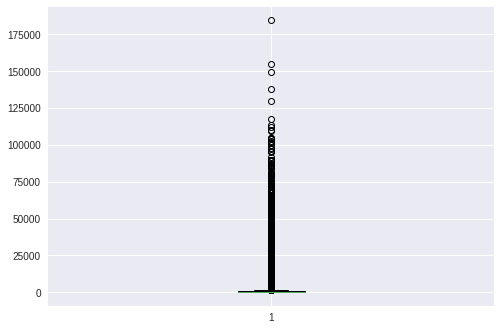

In [156]:
plt.boxplot(df["vlrliquido"]);

Dataset apresentou uma distribuição irregular dos valores. Pois tivemos o 3º quartil com o valor de 674, e no gráfico Box Plot, existem vários outliers, onde devido a grande variedade destes, o gráfico ficou muito poluído.

A seguir, vamos filtrar o dataframe para mostrar alguns desses outliers.

In [157]:
df_outliers = df[df["vlrliquido"] > 75000]

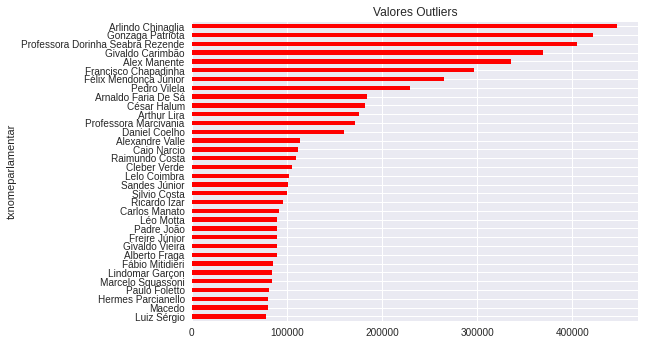

In [158]:
# Plotar em gráfico os deputados que estão nos outliers
df_outliers.groupby(df_outliers["txnomeparlamentar"])["vlrliquido"].sum().round(2).sort_values(ascending=True).plot.barh(title="Valores Outliers", color="red")
#plt.xlabel("sgpartido")
#plt.style.use("seaborn")
#plt.ylabel("vlrliquido")
plt.ticklabel_format(style="plain", axis="x");

In [159]:
# FIM